# Mobile Price Prediction
Import Necessary Libraries

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [80]:
import warnings
warnings.filterwarnings('ignore')

In [81]:
df = pd.read_csv("./train.csv")
print("Train dataset shape {}".format(df.shape))
df.sample(10)

Train dataset shape (2000, 21)


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
942,1061,1,2.1,0,3,1,52,0.1,109,7,...,138,1330,999,16,12,9,1,1,0,0
937,764,1,1.2,1,1,0,13,1.0,152,8,...,361,511,3148,18,7,6,1,1,0,2
1624,555,1,3.0,1,5,1,38,0.8,193,2,...,214,1970,1686,8,1,8,1,0,1,1
1208,989,1,0.7,0,13,1,51,0.4,132,3,...,670,804,2349,10,1,20,1,0,1,1
902,1698,0,2.5,0,10,1,26,0.4,105,2,...,485,1819,1656,5,3,17,1,0,1,2
862,1065,1,0.5,0,0,1,14,0.7,89,2,...,188,928,3078,10,1,18,1,0,1,2
59,1063,0,1.4,1,2,1,48,1.0,128,5,...,127,683,2910,15,13,9,1,1,1,2
218,1886,0,0.5,0,0,1,24,0.4,112,3,...,809,1958,1179,16,7,20,1,0,1,1
253,835,0,1.1,1,2,0,7,0.2,101,4,...,323,1604,1181,13,5,15,1,1,1,0
1191,921,1,2.2,1,12,1,10,0.1,170,7,...,1272,1469,3153,8,2,11,1,1,0,3


In [82]:
columns = df.columns.to_list()
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [84]:
[[x,len(df[x].value_counts())] for x in columns]

[['battery_power', 1094],
 ['blue', 2],
 ['clock_speed', 26],
 ['dual_sim', 2],
 ['fc', 20],
 ['four_g', 2],
 ['int_memory', 63],
 ['m_dep', 10],
 ['mobile_wt', 121],
 ['n_cores', 8],
 ['pc', 21],
 ['px_height', 1137],
 ['px_width', 1109],
 ['ram', 1562],
 ['sc_h', 15],
 ['sc_w', 19],
 ['talk_time', 19],
 ['three_g', 2],
 ['touch_screen', 2],
 ['wifi', 2],
 ['price_range', 4]]

In [85]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [86]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


Target column => price_range

<Axes: >

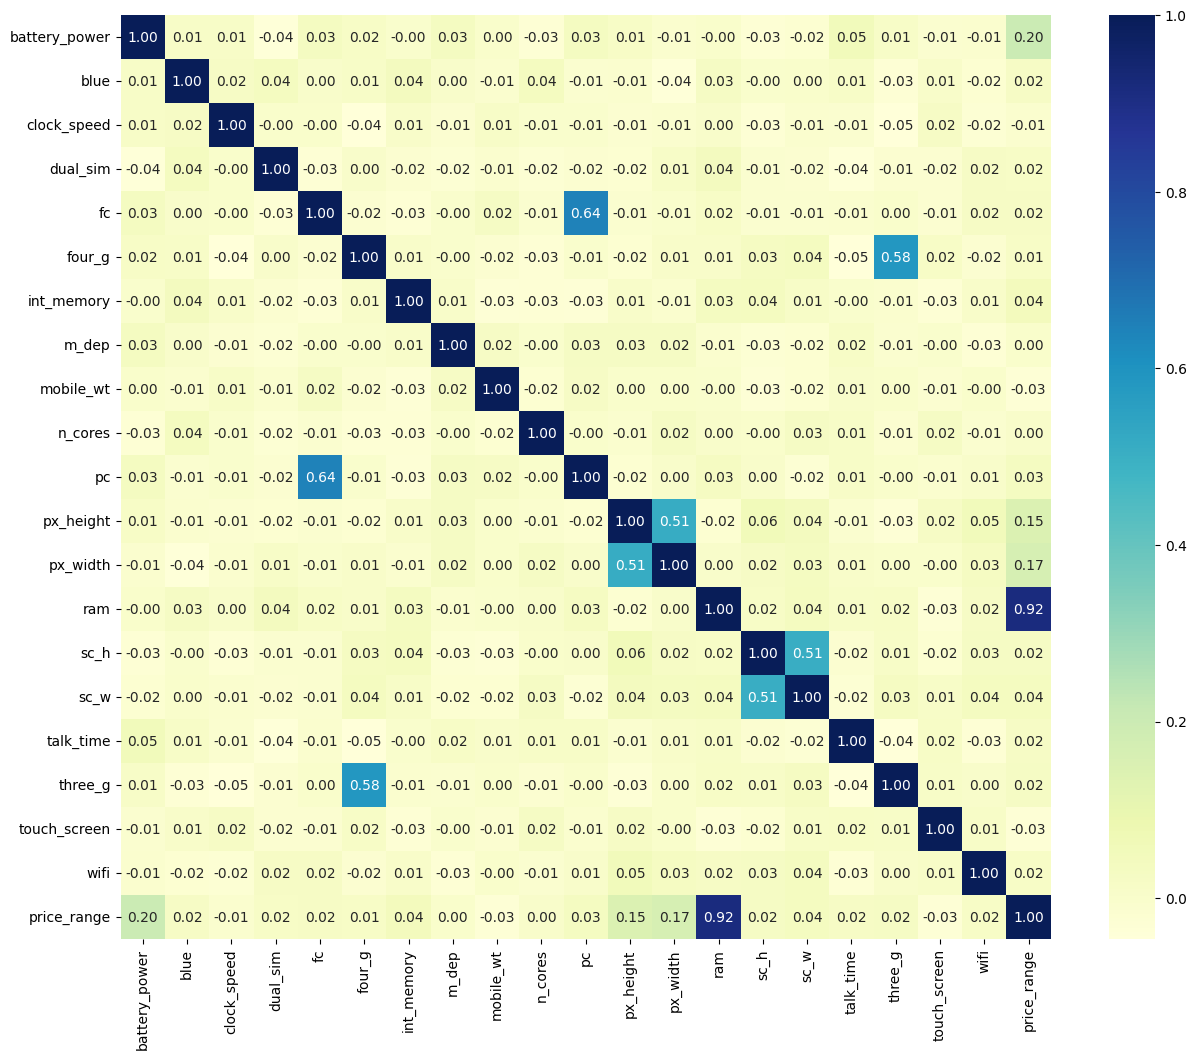

In [87]:
fig, ax = plt.subplots(1,1,sharex=True, figsize=(15,12))
sns.heatmap(df.corr(), fmt='.2f', cmap="YlGnBu", annot=True)

Observations: \
These factors most influence the price range of mobile
1) battery_power
2) px_height
3) px_width
4) ram

In [88]:
b_cols = ['blue', 'dual_sim', 'four_g', 'n_cores', 'three_g', 'touch_screen', 'wifi']

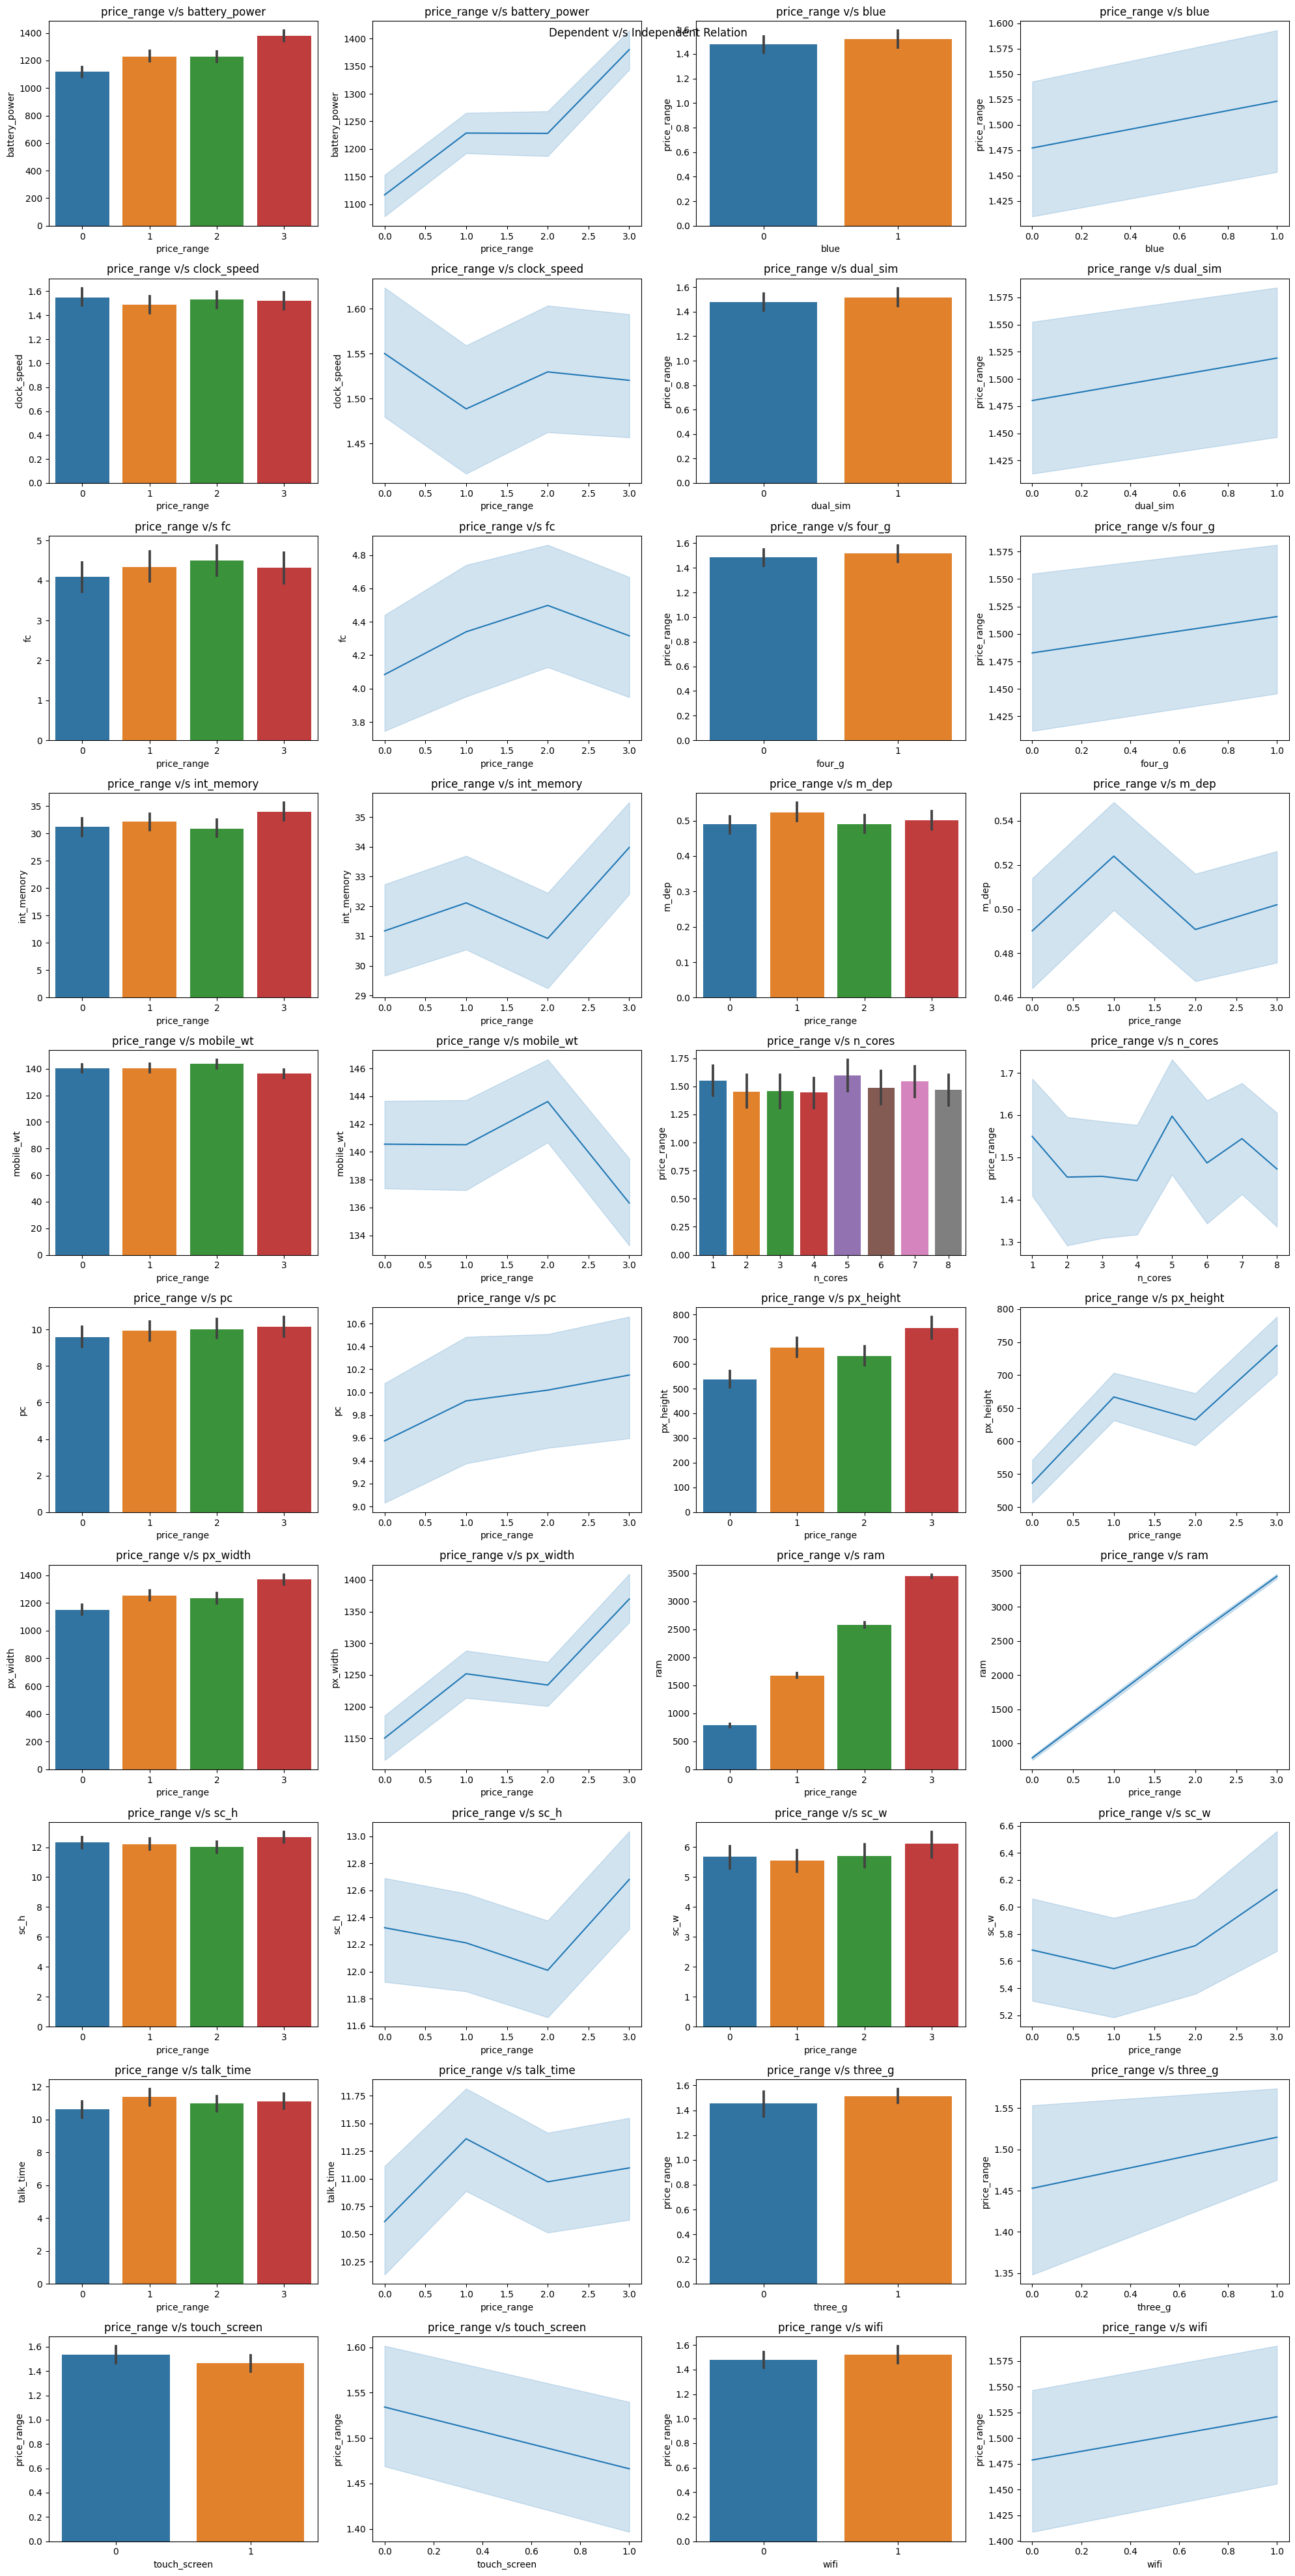

In [89]:
fig, axes = plt.subplots(10,4,figsize=(20,40))
fig.suptitle("Dependent v/s Independent Relation")
for i in range (len(columns)-1):
    posx = i // 2
    posy = i % 2 * 2
    axes[posx,posy].set_title(columns[20] + " v/s " + columns[i])
    axes[posx,posy+1].set_title(columns[20] + " v/s " + columns[i])
    if columns[i] not in b_cols:
        sns.barplot(data=df, x=columns[20], y=columns[i], ax=axes[posx,posy])
        sns.lineplot(data=df, x=columns[20], y=columns[i], ax=axes[posx,posy+1])
    else:
        sns.barplot(data=df, x=columns[i], y=columns[20], ax=axes[posx,posy])
        sns.lineplot(data=df, x=columns[i], y=columns[20], ax=axes[posx,posy+1])
plt.tight_layout()
plt.show()

# Observations:
- Battery Power
    - Price increase with increase in battery power 
- Bluetooth
    - Price increases with Bluetooth  
- Dual Sim
    - Price increases with Dual sim  
- 4G
    - Price increases with 4G 
- Primary Camera
    - Price increases with increase in pixels of primary camera

In [90]:
for c in b_cols:
    df[c] = df[c].astype('category')
df['price_range'] = df['price_range'].astype('category')

In [91]:
X = df.drop('price_range', axis=1)
y = df['price_range']

In [92]:
X.sample(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
234,528,0,1.7,0,12,1,6,0.8,142,2,15,574,637,3256,9,8,6,1,1,0
1565,1062,0,0.5,0,3,1,39,0.9,124,4,4,571,817,1345,16,0,11,1,0,1
1567,940,0,2.9,0,0,0,16,0.7,115,4,1,499,1090,2192,15,13,9,1,1,1
38,790,0,2.0,1,16,1,11,0.3,87,6,17,347,730,3169,6,1,2,1,0,1
1162,865,0,1.2,1,8,0,59,0.1,159,3,9,805,1804,2361,16,11,19,1,0,1
749,802,1,2.4,1,1,0,45,0.8,157,3,9,1299,1633,3713,8,3,8,0,0,0
275,1220,0,2.9,0,3,0,62,0.5,125,4,8,403,1933,2589,19,11,15,1,1,1
1650,1948,0,2.9,1,4,0,5,0.2,136,1,13,651,700,361,6,1,10,0,1,0
1501,1970,1,0.5,1,0,1,15,1.0,132,2,0,1399,1684,1658,15,9,20,1,1,1
1737,987,1,1.9,0,4,1,52,0.5,83,3,8,419,736,2757,17,12,15,1,1,0


In [93]:
y.sample(10)

462     1
1219    0
1109    3
701     3
337     0
41      3
1508    2
1593    2
97      2
1770    3
Name: price_range, dtype: category
Categories (4, int64): [0, 1, 2, 3]

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [95]:
print("X_train shape: {}".format(X_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_train shape: {}".format(y_train.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (1600, 20)
X_test shape: (400, 20)
y_train shape: (1600,)
y_test shape: (400,)


In [96]:
def Evaluate_model(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("Accuracy Score: {}".format(round(accuracy_score(y_test, y_pred)*100, 2)))
    print("Classification Report: \n{}".format(classification_report(y_test, y_pred)))
    print("Confusion Matrix: \n{}".format(confusion_matrix(y_test, y_pred)))

In [97]:
Evaluate_model(LogisticRegression())

Accuracy Score: 64.5
Classification Report: 
              precision    recall  f1-score   support

           0       0.84      0.88      0.86        95
           1       0.56      0.58      0.57        92
           2       0.44      0.43      0.44        99
           3       0.72      0.68      0.70       114

    accuracy                           0.65       400
   macro avg       0.64      0.64      0.64       400
weighted avg       0.64      0.65      0.64       400

Confusion Matrix: 
[[84 10  1  0]
 [16 53 19  4]
 [ 0 29 43 27]
 [ 0  2 34 78]]


In [98]:
Evaluate_model(DecisionTreeClassifier())

Accuracy Score: 82.75
Classification Report: 
              precision    recall  f1-score   support

           0       0.93      0.92      0.92        95
           1       0.78      0.76      0.77        92
           2       0.72      0.74      0.73        99
           3       0.89      0.89      0.89       114

    accuracy                           0.83       400
   macro avg       0.83      0.82      0.83       400
weighted avg       0.83      0.83      0.83       400

Confusion Matrix: 
[[ 87   7   1   0]
 [  7  70  15   0]
 [  0  13  73  13]
 [  0   0  13 101]]


In [99]:
Evaluate_model(RandomForestClassifier())

Accuracy Score: 86.75
Classification Report: 
              precision    recall  f1-score   support

           0       0.93      0.99      0.96        95
           1       0.82      0.79      0.81        92
           2       0.81      0.72      0.76        99
           3       0.89      0.96      0.92       114

    accuracy                           0.87       400
   macro avg       0.86      0.86      0.86       400
weighted avg       0.86      0.87      0.86       400

Confusion Matrix: 
[[ 94   1   0   0]
 [  7  73  12   0]
 [  0  15  71  13]
 [  0   0   5 109]]


In [100]:
Evaluate_model(GaussianNB())

Accuracy Score: 83.5
Classification Report: 
              precision    recall  f1-score   support

           0       0.96      0.94      0.95        95
           1       0.76      0.75      0.75        92
           2       0.72      0.71      0.71        99
           3       0.89      0.93      0.91       114

    accuracy                           0.83       400
   macro avg       0.83      0.83      0.83       400
weighted avg       0.83      0.83      0.83       400

Confusion Matrix: 
[[ 89   6   0   0]
 [  4  69  19   0]
 [  0  16  70  13]
 [  0   0   8 106]]


In [101]:
Evaluate_model(SVC(kernel='linear'))

Accuracy Score: 97.75
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        95
           1       0.98      0.97      0.97        92
           2       0.94      0.98      0.96        99
           3       0.99      0.97      0.98       114

    accuracy                           0.98       400
   macro avg       0.98      0.98      0.98       400
weighted avg       0.98      0.98      0.98       400

Confusion Matrix: 
[[ 94   1   0   0]
 [  0  89   3   0]
 [  0   1  97   1]
 [  0   0   3 111]]


In [102]:
Evaluate_model(KNeighborsClassifier(10))

Accuracy Score: 95.25
Classification Report: 
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        95
           1       0.94      0.97      0.95        92
           2       0.91      0.92      0.91        99
           3       0.98      0.93      0.95       114

    accuracy                           0.95       400
   macro avg       0.95      0.95      0.95       400
weighted avg       0.95      0.95      0.95       400

Confusion Matrix: 
[[ 95   0   0   0]
 [  2  89   1   0]
 [  0   6  91   2]
 [  0   0   8 106]]
